![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Session 5 and 6

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-11-12)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_5_6_EXERCISES.ipynb)

# EXERCISE 1: image filtering

From the datasets (images) available from [skimage data](https://scikit-image.org/docs/dev/api/skimage.data.html), choose an **RGB** image and do the following:

* Crop the image
* Smoothen the image with a kernel filter.
* Sharpen the image with a kernel filter
* Find the edges of the image with at least two different methods.
* From the processes above, save the image that you prefer as a .jpg

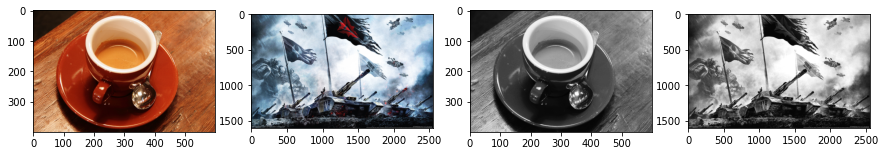

In [3]:
# import image 

import matplotlib.pyplot as plt
import pandas as pd 
import imageio
from skimage import data
from skimage.color import rgb2hsv ,rgb2gray 
from PIL import Image
from scipy import ndimage


image = data.coffee()
gray_image = rgb2gray(image)

cool = imageio.imread('/content/212218.jpg')
gray_cool = rgb2gray(cool)

fig, ax = plt.subplots(ncols=4, figsize=(15, 15))
ax[0].imshow(image )
ax[1].imshow(cool )
ax[2].imshow(gray_image,cmap=plt.cm.gray )
ax[3].imshow(gray_cool,cmap=plt.cm.gray )

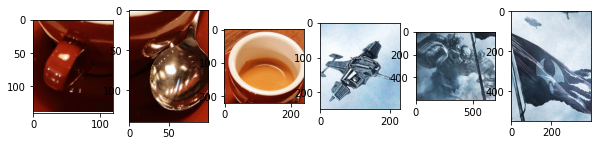

In [4]:
#Crop the image
fig, ax = plt.subplots(ncols=6, figsize=(10, 10))

ax[0].imshow(image[200:340,180:300])
ax[1].imshow(image[200:340,300:400])
ax[2].imshow(image[10:230,160:400])
ax[3].imshow(cool[0:250,1920:2150])
ax[4].imshow(cool[600:1200,0:700])
ax[5].imshow(cool[200:750,450:850])

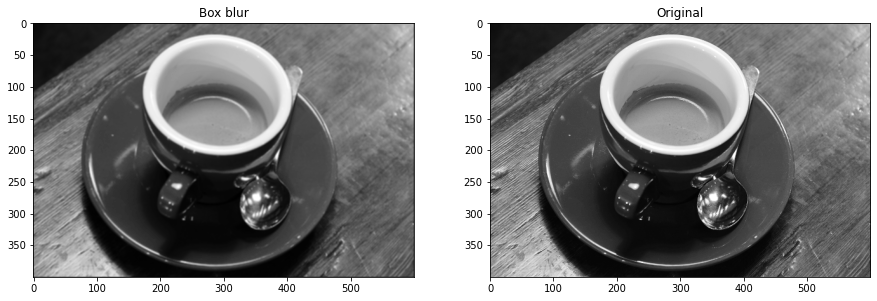

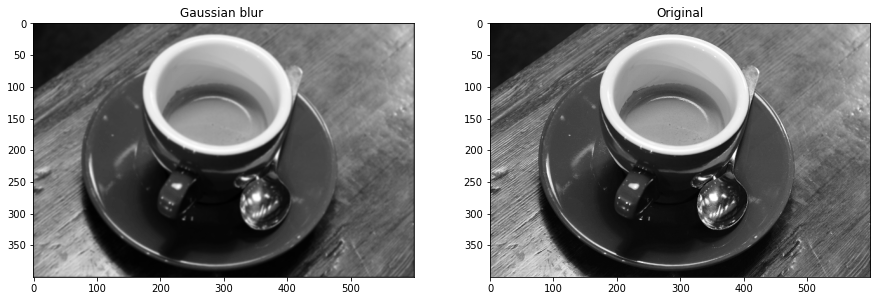

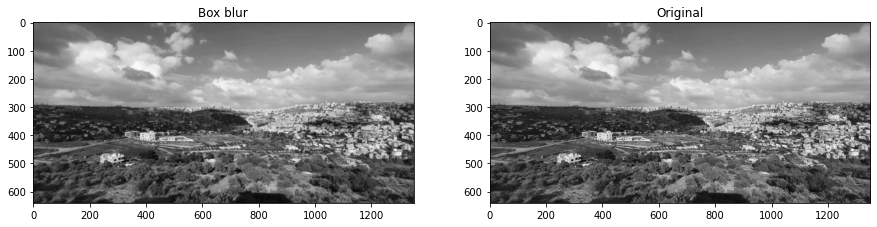

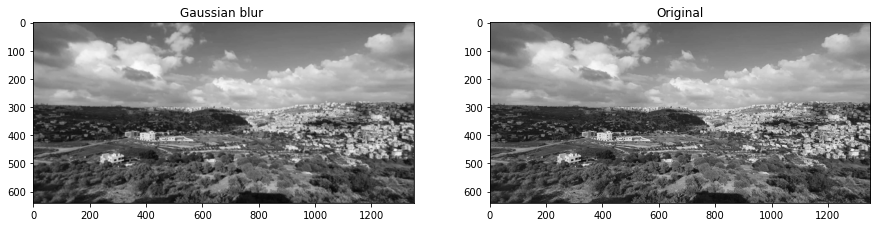

In [72]:
#Smoothen the image with a kernel filter.


#1 create Kenrals 
Blur_kernel = np.array([ [1/9,1/9,1/9], 
                    [1/9,1/9,1/9], 
                    [1/9,1/9,1/9]]) 
gussian_kernel = 1/256*np.array([ [1, 4, 6, 4, 1], 
                        [4, 16, 24, 16, 4], 
                        [6, 24, 36, 24, 6],
                        [4, 16, 24, 16, 4],
                        [1, 4, 6, 4, 1]]) 


#2 Smooth Images 
# 2.1 using Blur Kernal
smooth_image1 = ndimage.convolve(gray_image, Blur_kernel, mode='constant', cval=0.0)
smooth_cool1 = ndimage.convolve(gray_cool, Blur_kernel, mode='constant', cval=0.0)
#  2.2 using Gussian Kernal 
smooth_image2 = ndimage.convolve(gray_image, gussian_kernel, mode='constant', cval=0.0)
smooth_cool2 = ndimage.convolve(gray_cool, gussian_kernel, mode='constant', cval=0.0)


#3 display 

fig, ax = plt.subplots(ncols=2, figsize=(15, 15))
ax[0].set_title('Box blur')
ax[0].imshow(smooth_image1 ,cmap=plt.cm.gray  )
ax[1].set_title('Original')
ax[1].imshow(gray_image,cmap=plt.cm.gray )

fig, ax = plt.subplots(ncols=2, figsize=(15, 15))
ax[0].set_title('Gaussian blur ')
ax[0].imshow(smooth_image2 ,cmap=plt.cm.gray  )
ax[1].set_title('Original')
ax[1].imshow(gray_image,cmap=plt.cm.gray )

fig, ax = plt.subplots(ncols=2, figsize=(15, 15))
ax[0].set_title('Box blur')
ax[0].imshow(smooth_cool1 ,cmap=plt.cm.gray  )
ax[1].set_title('Original')
ax[1].imshow(gray_cool,cmap=plt.cm.gray )

fig, ax = plt.subplots(ncols=2, figsize=(15, 15))
ax[0].set_title('Gaussian blur ')
ax[0].imshow(smooth_cool2 ,cmap=plt.cm.gray  )
ax[1].set_title('Original')
ax[1].imshow(gray_cool,cmap=plt.cm.gray )


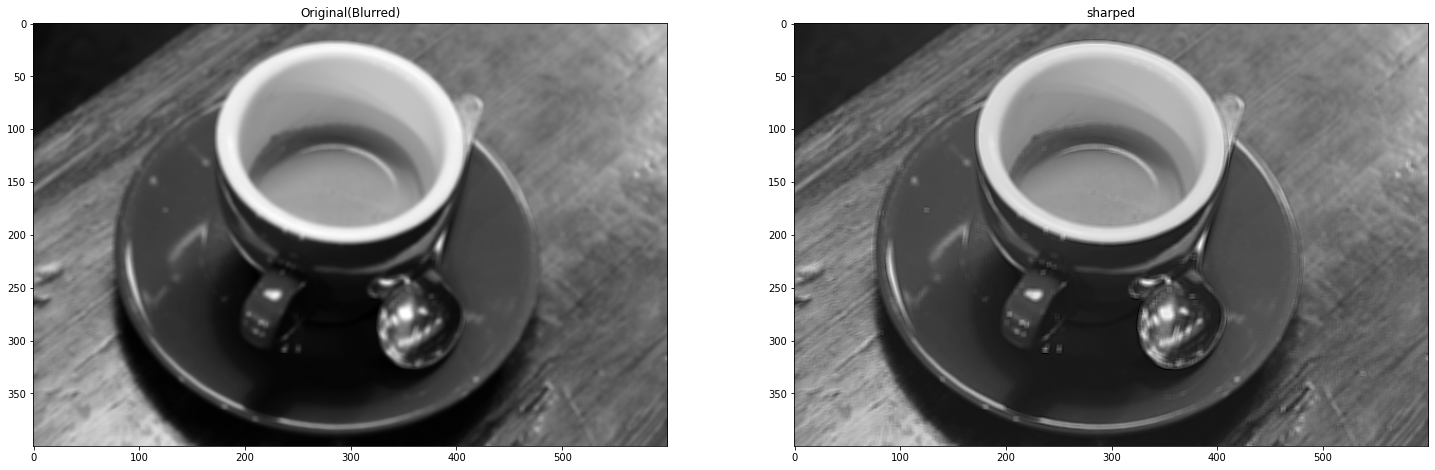

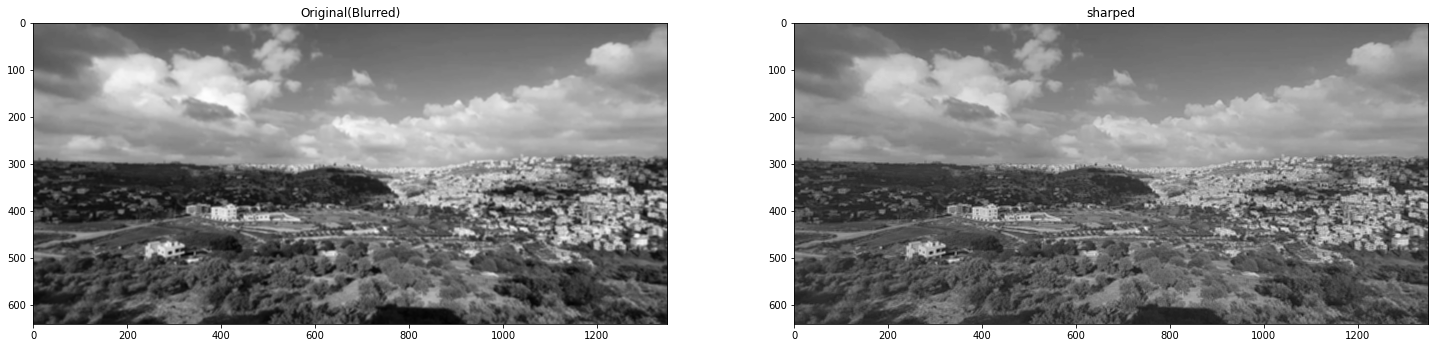

In [78]:
#Sharpen the image with a kernel filter

cool = imageio.imread('/content/home.jpg')
gray_cool = rgb2gray(cool)
#1 Import Image and blurr it .  

gray_image = rgb2gray(image)
blur_image = ndimage.uniform_filter(gray_image, size=5)


gray_cool = rgb2gray(cool)
blur_cool = ndimage.uniform_filter(gray_cool, size=5)

#2 Sharpen Image 
kernel_sharpen2 = np.array([ [0, -1, 0], 
                    [-1,5, -1], 
                    [0, -1, 0]])

sharpe_image2 = ndimage.convolve((blur_image), kernel_sharpen2,  mode='mirror', cval=0.0)


sharpe_image3 = ndimage.convolve((blur_cool), kernel_sharpen2,  mode='mirror', cval=0.0)


#3 Display
fig, ax = plt.subplots(ncols=2, figsize=(25, 25))
ax[0].set_title('Original(Blurred)')
ax[0].imshow(blur_image ,cmap=plt.cm.gray  )
ax[1].set_title('sharped')
ax[1].imshow(sharpe_image2,cmap=plt.cm.gray)



fig, ax = plt.subplots(ncols=2, figsize=(25, 25))
ax[0].set_title('Original(Blurred)')
ax[0].imshow(blur_cool ,cmap=plt.cm.gray  )
ax[1].set_title('sharped')
ax[1].imshow(sharpe_image3,cmap=plt.cm.gray)


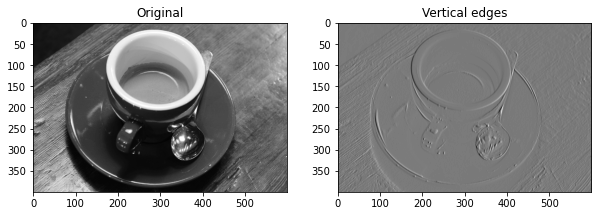

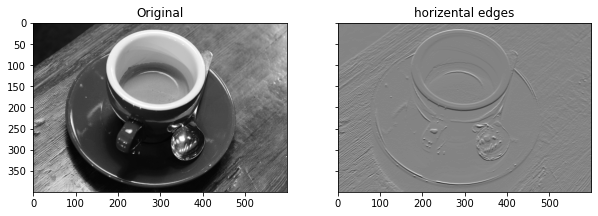

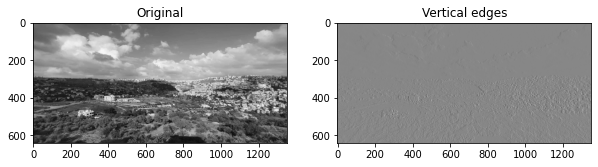

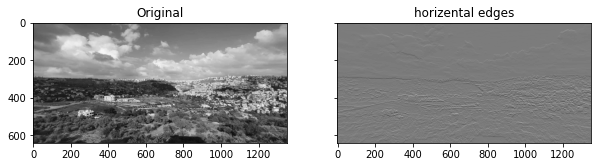

In [180]:
#Find the edges of the image with at least two different methods.

#1 Import Image 
image = data.coffee()
gray_image = rgb2gray(image)
image2 = imageio.imread('/content/home.jpg')
gray_image2 = rgb2gray(image2)

#2 High frequency extraction (edges) using horizental and virtical kernals 
kernel_v = np.array([[-1, 0, 1], 
                    [-1, 0, 1], 
                    [-1, 0, 1]])
kernel_h = np.array([ [1, 1, 1], 
                    [0, 0, 0], 
                    [-1, -1, -1]])
filtered = ndimage.convolve(gray_image, kernel_v, mode='mirror', cval=0)
filtered2 = ndimage.convolve(gray_image, kernel_h, mode='mirror', cval=0)
filtered3 = ndimage.convolve(gray_image2, kernel_v, mode='mirror', cval=0)
filtered4 = ndimage.convolve(gray_image2, kernel_h, mode='mirror', cval=0)
#3 display 
fig, ax = plt.subplots(ncols=2, figsize=(10, 10))
ax[0].set_title('Original')
ax[0].imshow(gray_image ,cmap=plt.cm.gray  )
ax[1].set_title('Vertical edges')
ax[1].imshow(filtered,cmap=plt.cm.gray)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True , figsize=(10, 10))
ax[0].set_title('Original')
ax[0].imshow(gray_image ,cmap=plt.cm.gray  )
ax[1].set_title('horizental edges')
ax[1].imshow(filtered2,cmap=plt.cm.gray)

fig, ax = plt.subplots(ncols=2, figsize=(10, 10))
ax[0].set_title('Original')
ax[0].imshow(gray_image2 ,cmap=plt.cm.gray  )
ax[1].set_title('Vertical edges')
ax[1].imshow(filtered3,cmap=plt.cm.gray)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True , figsize=(10, 10))
ax[0].set_title('Original')
ax[0].imshow(gray_image2 ,cmap=plt.cm.gray  )
ax[1].set_title('horizental edges')
ax[1].imshow(filtered4,cmap=plt.cm.gray)

# EXERCISE 2: semi-super resolution!

Take one image on your own (or one blurred image from somewhere) and apply the techniques we have seen in class to sharpen an image from a blurred one. You can also blur one image of your own as a start.

# EXERCISE 3: image segmentation
Take a picture with your phone or your camera of some objects that you want to count. (Beware: try to take high contrast images with a stable background, preferably dark over white or similar such as coins, chessboard, etc.).

Load the image with scikit image
Count the objects in the image using region based segmentation
Try to fix the image using opening/closing algorithms